## KMeans clustering on correlations

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
%matplotlib inline
plt.style.use('seaborn')

In [19]:
# read saved dataset.
def get_monthly_result(month='nov', n_clusters=3):
    #month = 'nov'
    df_normalized = pd.read_csv(f'data/normalized_{month}.csv')
    df_normalized = df_normalized.drop(columns=['Unnamed: 0'])
    df_normalized.head()

    # get groups and keys on dataset.

    new_groups = df_normalized.groupby('meterid')
    new_keys = new_groups.groups.keys()  # keys: an iterable of dataids or meter ids

    new_id_list = list(new_keys)
    display('number of valid meterids:', len(new_id_list))

    #  Construct dataframe over which to run correlation analysis.

    df_total = pd.DataFrame()
    display(df_total)
    for key in new_id_list:
        df_i = new_groups.get_group(key).rename(columns={'norm_cumul_value': f'{key}'}).reset_index()    
        df_total = pd.concat([df_total, df_i[f'{key}']], axis=1)

    display(len(df_total))
    display(df_total)  # column names are meterids

    # get corr matrix

    df_total = df_total.fillna(0)
    df_corr = df_total.corr()  # get correlations between meterids for the month's cumulative vals.
    df_corr = df_corr.fillna(0)
    display(df_corr)

    # find top n positive correlations per meterid
    n = 10
    for meterid in new_id_list[1:2]:    
        # slice is to show an example.
        df_corr_sorted = df_corr[f'{meterid}'].sort_values(ascending=False)
        sr_top5 = df_corr_sorted.iloc[1:1+n]
        df_top5 = sr_top5.to_frame()
        df_top5 = df_top5.rename(columns={f'{meterid}': 'r'})

        data = [meterid for i in range(n)]
        df_top5 = df_top5.assign(id=data)
        display(df_top5)

    # clustering

    #n_clusters = 4
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df_corr)
    labels = kmeans.labels_
    print(labels)

    origin_date = df_normalized['index'].iloc[0]

    for cluster_label in range(n_clusters):
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,3))
        axes.set_title(f'cluster {cluster_label}; count: {list(labels).count(cluster_label)}')
        axes.set_xlabel(f'hours elapsed since {origin_date}')
        axes.set_ylabel(f'cumul value')
        i = 0
        for key in new_id_list:
            if labels[i] == cluster_label:
                axes.scatter(df_total.index, df_total[f'{key}'])

            i += 1

'number of valid meterids:'

118

""


721

,35,44,77,94,114,187,252,370,483,484,...,9121,9134,9278,9295,9631,9639,9729,9766,9849,9982
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12.0,0.0,0.0,0.0,30.0,0.0,2.0,8.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12.0,0.0,8.0,0.0,30.0,0.0,2.0,8.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14.0,0.0,8.0,0.0,30.0,0.0,2.0,10.0,0.0,2.0,...,2.0,0.0,0.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0
4,14.0,0.0,8.0,2.0,30.0,0.0,2.0,10.0,0.0,2.0,...,4.0,0.0,0.0,2.0,8.0,2.0,0.0,0.0,0.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,1670.0,1588.0,854.0,2934.0,1960.0,2684.0,2878.0,948.0,2680.0,1772.0,...,3324.0,5160.0,2006.0,2792.0,1086.0,7132.0,1886.0,2548.0,908.0,1832.0
717,1676.0,1588.0,854.0,2934.0,1960.0,2684.0,2880.0,948.0,2690.0,1772.0,...,3324.0,5162.0,2008.0,2822.0,1094.0,7154.0,1888.0,2548.0,908.0,1838.0
718,1684.0,1588.0,860.0,2934.0,1960.0,2684.0,2920.0,948.0,2706.0,1772.0,...,3324.0,5162.0,2008.0,2828.0,1094.0,7176.0,1890.0,2548.0,908.0,1844.0
719,1686.0,1590.0,860.0,2958.0,1960.0,2684.0,2930.0,948.0,2708.0,1776.0,...,3324.0,5238.0,2010.0,2832.0,1094.0,7192.0,1896.0,2548.0,908.0,1844.0


,35,44,77,94,114,187,252,370,483,484,...,9121,9134,9278,9295,9631,9639,9729,9766,9849,9982
35,1.000000,0.946914,0.983875,0.961489,0.988778,0.984140,0.952977,0.939017,0.916408,0.992775,...,0.980042,0.978690,0.945667,0.995490,0.993312,0.985468,0.968704,0.981064,0.994784,0.994337
44,0.946914,1.000000,0.953504,0.930343,0.940092,0.907403,0.899632,0.850495,0.844455,0.950564,...,0.930101,0.938139,0.847065,0.932936,0.947213,0.941353,0.907196,0.937795,0.948361,0.955438
77,0.983875,0.953504,1.000000,0.919246,0.959442,0.953459,0.897538,0.866205,0.839185,0.971076,...,0.943560,0.944942,0.879018,0.970158,0.974686,0.955033,0.916490,0.952122,0.989380,0.981651
94,0.961489,0.930343,0.919246,1.000000,0.988503,0.964625,0.994359,0.942711,0.974272,0.984323,...,0.994917,0.995416,0.938562,0.974257,0.975972,0.991472,0.990795,0.991497,0.955921,0.972365
114,0.988778,0.940092,0.959442,0.988503,1.000000,0.985998,0.983448,0.948053,0.955006,0.996477,...,0.997101,0.996329,0.947863,0.994666,0.991272,0.997169,0.989162,0.995611,0.982673,0.990544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9639,0.985468,0.941353,0.955033,0.991472,0.997169,0.983694,0.986083,0.948629,0.959156,0.996021,...,0.997727,0.998751,0.951006,0.991939,0.991675,1.000000,0.991044,0.995949,0.980980,0.990694
9729,0.968704,0.907196,0.916490,0.990795,0.989162,0.977188,0.996008,0.973600,0.985602,0.981982,...,0.994031,0.992168,0.970390,0.982374,0.974854,0.991044,1.000000,0.987335,0.956262,0.969814
9766,0.981064,0.937795,0.952122,0.991497,0.995611,0.979081,0.983186,0.938095,0.955176,0.995092,...,0.996579,0.995315,0.940991,0.990623,0.990122,0.995949,0.987335,1.000000,0.979847,0.988736
9849,0.994784,0.948361,0.989380,0.955921,0.982673,0.976500,0.940615,0.912749,0.897888,0.991655,...,0.974552,0.972775,0.925798,0.991491,0.995129,0.980980,0.956262,0.979847,1.000000,0.995599


,r,id
2575,0.965928,44
2980,0.959013,44
2945,0.956767,44
5484,0.956571,44
9982,0.955438,44
77,0.953504,44
7739,0.952377,44
484,0.950564,44
8084,0.948597,44
9849,0.948361,44


[1 1 1 0 0 0 0 2 2 0 0 0 0 2 1 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 2 0 0 0 1 1 1 0 0 2 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 2 1 2 0 0 0
 1 0 0 0 0 0 0 0 2 1 1 0 0 2 0 2 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 2 0 0 0 2
 0 0 0 0 0 1 1]


'number of valid meterids:'

119

""


745

,35,44,77,94,114,187,252,370,483,484,...,9121,9134,9278,9295,9631,9639,9729,9766,9849,9982
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6.0,0.0,0.0,14.0,0.0,0.0,14.0,62.0,16.0,0.0,...,10.0,24.0,0.0,26.0,10.0,18.0,8.0,0.0,0.0,8.0
2,38.0,4.0,8.0,22.0,0.0,0.0,18.0,64.0,16.0,4.0,...,10.0,50.0,12.0,72.0,10.0,36.0,12.0,0.0,0.0,8.0
3,38.0,18.0,10.0,38.0,0.0,0.0,20.0,64.0,16.0,24.0,...,10.0,74.0,12.0,112.0,10.0,50.0,14.0,0.0,10.0,22.0
4,38.0,28.0,10.0,46.0,0.0,0.0,32.0,66.0,16.0,26.0,...,10.0,86.0,12.0,112.0,52.0,72.0,16.0,214.0,10.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,1968.0,1760.0,986.0,5626.0,3952.0,5290.0,4766.0,2728.0,4642.0,2578.0,...,5654.0,8220.0,5006.0,6556.0,3574.0,10594.0,3076.0,4178.0,968.0,1972.0
741,1968.0,1762.0,992.0,5644.0,3952.0,5290.0,4774.0,2730.0,4642.0,2606.0,...,5696.0,8222.0,5006.0,6562.0,3574.0,10618.0,3076.0,4388.0,978.0,1972.0
742,1968.0,1762.0,992.0,5650.0,3960.0,5290.0,4776.0,2732.0,4656.0,2624.0,...,5722.0,8224.0,5008.0,6568.0,3574.0,10636.0,3076.0,4388.0,978.0,1976.0
743,1970.0,1770.0,994.0,5658.0,3960.0,5290.0,4776.0,2732.0,4664.0,2636.0,...,5738.0,8270.0,5008.0,6580.0,3574.0,10656.0,3076.0,4388.0,982.0,1980.0


,35,44,77,94,114,187,252,370,483,484,...,9121,9134,9278,9295,9631,9639,9729,9766,9849,9982
35,1.000000,0.957005,0.975981,0.996383,0.993525,0.988584,0.994915,0.990921,0.990720,0.990785,...,0.996293,0.986784,0.991450,0.994156,0.984913,0.996081,0.994440,0.994598,0.978881,0.990150
44,0.957005,1.000000,0.954906,0.954778,0.958965,0.942081,0.950317,0.964298,0.953696,0.955410,...,0.961070,0.952231,0.945161,0.944995,0.951729,0.944495,0.939653,0.954422,0.969699,0.934643
77,0.975981,0.954906,1.000000,0.983559,0.974189,0.965539,0.971541,0.975798,0.966747,0.994504,...,0.982425,0.974708,0.975900,0.981041,0.969397,0.977365,0.955361,0.969726,0.986814,0.973759
94,0.996383,0.954778,0.983559,1.000000,0.996680,0.992686,0.996606,0.992827,0.993873,0.995778,...,0.999022,0.993584,0.988226,0.997581,0.988551,0.997040,0.991828,0.993714,0.981692,0.995511
114,0.993525,0.958965,0.974189,0.996680,1.000000,0.993535,0.997375,0.992187,0.996526,0.988379,...,0.997236,0.995123,0.978717,0.993469,0.985131,0.992907,0.992272,0.992537,0.979010,0.991595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9639,0.996081,0.944495,0.977365,0.997040,0.992907,0.990423,0.994227,0.983227,0.986626,0.992002,...,0.994155,0.985446,0.993041,0.999071,0.976806,1.000000,0.993586,0.995014,0.969858,0.993981
9729,0.994440,0.939653,0.955361,0.991828,0.992272,0.990091,0.995555,0.984422,0.991298,0.978555,...,0.991381,0.984265,0.983287,0.991314,0.979895,0.993586,1.000000,0.992890,0.960198,0.990062
9766,0.994598,0.954422,0.969726,0.993714,0.992537,0.989365,0.991251,0.984771,0.986482,0.986602,...,0.992398,0.981340,0.989570,0.993890,0.976782,0.995014,0.992890,1.000000,0.967253,0.988705
9849,0.978881,0.969699,0.986814,0.981692,0.979010,0.964918,0.976611,0.988710,0.979151,0.985493,...,0.985606,0.984521,0.964630,0.971032,0.982552,0.969858,0.960198,0.967253,1.000000,0.969467


,r,id
1800,0.970938,44
5484,0.969939,44
9849,0.969699,44
3635,0.967301,44
2945,0.966984,44
744,0.965922,44
8386,0.965727,44
370,0.964298,44
7682,0.964245,44
2980,0.963493,44


[0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 0 1 0]


'number of valid meterids:'

119

""


745

,35,44,77,94,114,187,252,370,483,484,...,9121,9134,9278,9295,9631,9639,9729,9766,9849,9982
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,22.0,0.0,0.0,0.0,2.0,0.0,4.0,...,12.0,16.0,16.0,8.0,0.0,24.0,10.0,0.0,0.0,0.0
2,4.0,2.0,0.0,24.0,0.0,0.0,0.0,8.0,14.0,20.0,...,12.0,40.0,18.0,14.0,0.0,36.0,18.0,0.0,0.0,14.0
3,6.0,2.0,0.0,28.0,0.0,0.0,0.0,12.0,36.0,42.0,...,46.0,54.0,20.0,14.0,0.0,48.0,22.0,0.0,0.0,14.0
4,24.0,2.0,0.0,30.0,0.0,0.0,2.0,12.0,52.0,60.0,...,74.0,92.0,20.0,36.0,0.0,66.0,38.0,0.0,0.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,3238.0,2952.0,1138.0,7304.0,6174.0,7756.0,7814.0,4750.0,9390.0,4272.0,...,8054.0,13424.0,4232.0,8060.0,6888.0,13688.0,6176.0,7554.0,1196.0,4738.0
741,3238.0,2974.0,1138.0,7308.0,6174.0,7756.0,7814.0,4750.0,9392.0,4286.0,...,8054.0,13424.0,4232.0,8060.0,6888.0,13688.0,6176.0,7554.0,1198.0,4738.0
742,3240.0,2974.0,1138.0,7310.0,6178.0,7756.0,7816.0,4752.0,9392.0,4292.0,...,8060.0,13426.0,4236.0,8080.0,6888.0,13690.0,6194.0,7554.0,1198.0,4738.0
743,3254.0,2974.0,1142.0,7310.0,6178.0,7756.0,7818.0,4752.0,9408.0,4294.0,...,8060.0,13428.0,4236.0,8080.0,6894.0,13690.0,6196.0,7554.0,1198.0,4738.0


,35,44,77,94,114,187,252,370,483,484,...,9121,9134,9278,9295,9631,9639,9729,9766,9849,9982
35,1.000000,0.996320,0.998197,0.992227,0.998622,0.993625,0.997647,0.995658,0.998845,0.998791,...,0.997942,0.999092,0.989148,0.998692,0.998709,0.998562,0.998498,0.996586,0.997105,0.998214
44,0.996320,1.000000,0.996913,0.994517,0.996907,0.996195,0.995531,0.994842,0.996301,0.997186,...,0.995884,0.997448,0.984497,0.996882,0.996729,0.996287,0.995368,0.996552,0.995552,0.997173
77,0.998197,0.996913,1.000000,0.991623,0.998441,0.994576,0.998109,0.997283,0.998180,0.997732,...,0.998636,0.998785,0.986003,0.998532,0.998845,0.998615,0.997985,0.997594,0.996963,0.998869
94,0.992227,0.994517,0.991623,1.000000,0.992702,0.997194,0.989391,0.990280,0.991002,0.994407,...,0.989713,0.993522,0.978962,0.991772,0.991510,0.990581,0.989784,0.993841,0.993225,0.992848
114,0.998622,0.996907,0.998441,0.992702,1.000000,0.995471,0.998965,0.997948,0.999143,0.998782,...,0.999197,0.999667,0.990472,0.999653,0.999418,0.999442,0.999053,0.997514,0.995137,0.999442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9639,0.998562,0.996287,0.998615,0.990581,0.999442,0.994115,0.999528,0.998439,0.999467,0.998106,...,0.999660,0.999579,0.989430,0.999618,0.999582,1.000000,0.999476,0.997132,0.994764,0.999337
9729,0.998498,0.995368,0.997985,0.989784,0.999053,0.993139,0.999410,0.997946,0.999602,0.997160,...,0.999521,0.999028,0.989252,0.999176,0.999528,0.999476,1.000000,0.995835,0.993770,0.998767
9766,0.996586,0.996552,0.997594,0.993841,0.997514,0.995653,0.996445,0.996326,0.996795,0.997167,...,0.996571,0.997709,0.983163,0.997247,0.997159,0.997132,0.995835,1.000000,0.996324,0.997795
9849,0.997105,0.995552,0.996963,0.993225,0.995137,0.993005,0.993450,0.992010,0.994856,0.996662,...,0.993988,0.996122,0.981332,0.994933,0.995194,0.994764,0.993770,0.996324,1.000000,0.995408


,r,id
5892,0.997839,44
5785,0.997766,44
5439,0.997738,44
7117,0.997680,44
2378,0.997565,44
7287,0.997521,44
6910,0.997516,44
2018,0.997500,44
1714,0.997465,44
9134,0.997448,44


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 2 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0]


'number of valid meterids:'

118

""


697

,35,44,77,94,114,187,252,370,483,484,...,9121,9134,9278,9295,9631,9639,9729,9766,9849,9982
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,8.0,0.0,2.0,0.0,34.0,6.0,0.0,0.0,...,0.0,2.0,0.0,6.0,0.0,0.0,4.0,0.0,0.0,8.0
2,12.0,0.0,10.0,0.0,14.0,0.0,34.0,6.0,0.0,22.0,...,0.0,2.0,14.0,6.0,6.0,10.0,6.0,0.0,42.0,8.0
3,12.0,0.0,10.0,0.0,14.0,0.0,34.0,8.0,0.0,44.0,...,0.0,20.0,14.0,12.0,6.0,10.0,6.0,0.0,42.0,22.0
4,12.0,28.0,10.0,2.0,14.0,0.0,34.0,10.0,0.0,46.0,...,0.0,22.0,18.0,24.0,6.0,10.0,6.0,0.0,42.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,1886.0,2006.0,1038.0,4504.0,2520.0,4326.0,3580.0,2448.0,3868.0,2734.0,...,4134.0,7128.0,1754.0,4300.0,2518.0,7120.0,2632.0,3688.0,1034.0,2464.0
693,1886.0,2006.0,1038.0,4504.0,2520.0,4326.0,3582.0,2448.0,3868.0,2736.0,...,4134.0,7128.0,1754.0,4300.0,2520.0,7120.0,2632.0,3688.0,1034.0,2464.0
694,1886.0,2006.0,1038.0,4504.0,2520.0,4326.0,3582.0,2462.0,3888.0,2736.0,...,4134.0,7132.0,1754.0,4300.0,2520.0,7120.0,2634.0,3688.0,1034.0,2464.0
695,1886.0,2006.0,1038.0,4506.0,2520.0,4326.0,3584.0,2462.0,3898.0,2736.0,...,4142.0,7132.0,1754.0,4302.0,2520.0,7122.0,2638.0,3688.0,1036.0,2464.0


,35,44,77,94,114,187,252,370,483,484,...,9121,9134,9278,9295,9631,9639,9729,9766,9849,9982
35,1.000000,0.928054,0.995099,0.993597,0.983746,0.984711,0.980459,0.991785,0.968330,0.998636,...,0.995779,0.992645,0.993353,0.990607,0.983715,0.991435,0.989412,0.986318,0.991105,0.993778
44,0.928054,1.000000,0.935642,0.929728,0.913702,0.904353,0.909700,0.921810,0.895920,0.926429,...,0.927134,0.929115,0.918664,0.919310,0.906830,0.924835,0.922948,0.920418,0.923171,0.936351
77,0.995099,0.935642,1.000000,0.989228,0.975610,0.977124,0.968558,0.990526,0.954455,0.996814,...,0.990448,0.988161,0.994216,0.985055,0.974992,0.987072,0.980041,0.978783,0.996891,0.993138
94,0.993597,0.929728,0.989228,1.000000,0.996072,0.995777,0.993892,0.995973,0.987121,0.994598,...,0.999281,0.999842,0.977294,0.998487,0.995818,0.999538,0.997674,0.997180,0.983740,0.997804
114,0.983746,0.913702,0.975610,0.996072,1.000000,0.997954,0.996659,0.992725,0.994239,0.985808,...,0.994547,0.996259,0.960133,0.997909,0.998532,0.996357,0.996914,0.997775,0.970642,0.992366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9639,0.991435,0.924835,0.987072,0.999538,0.996357,0.996252,0.995108,0.994908,0.989212,0.992644,...,0.998784,0.999718,0.973897,0.998379,0.996634,1.000000,0.997915,0.997315,0.981073,0.996474
9729,0.989412,0.922948,0.980041,0.997674,0.996914,0.995377,0.997808,0.991091,0.993092,0.988790,...,0.997531,0.998088,0.968392,0.996969,0.996813,0.997915,1.000000,0.997426,0.973067,0.992826
9766,0.986318,0.920418,0.978783,0.997180,0.997775,0.996806,0.996573,0.992104,0.993283,0.987674,...,0.995985,0.997410,0.964558,0.997539,0.997658,0.997315,0.997426,1.000000,0.972681,0.993416
9849,0.991105,0.923171,0.996891,0.983740,0.970642,0.973632,0.961231,0.987835,0.946210,0.994441,...,0.985100,0.982289,0.992839,0.980794,0.970322,0.981073,0.973067,0.972681,1.000000,0.990093


,r,id
8155,0.948046,44
5785,0.945293,44
9982,0.936351,44
77,0.935642,44
1415,0.935328,44
744,0.934480,44
2449,0.933765,44
4228,0.933536,44
7682,0.931510,44
1697,0.931301,44


[2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2
 2 0 2 2 2 2 2 2 1 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 0
 2 2 2 2 2 0 2]


'number of valid meterids:'

90

""


745

,35,77,94,252,370,483,484,661,739,744,...,8156,8829,8890,9121,9134,9278,9295,9631,9729,9766
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18.0,0.0,6.0,0.0,0.0,0.0,18.0,0.0,0.0,14.0,...,0.0,0.0,8.0,0.0,0.0,0.0,10.0,0.0,2.0,18.0
2,28.0,0.0,6.0,0.0,20.0,0.0,20.0,2.0,0.0,16.0,...,2.0,2.0,8.0,8.0,2.0,16.0,10.0,0.0,2.0,18.0
3,28.0,10.0,6.0,0.0,22.0,0.0,22.0,2.0,0.0,16.0,...,2.0,2.0,10.0,8.0,12.0,24.0,12.0,2.0,2.0,18.0
4,28.0,10.0,20.0,2.0,24.0,0.0,22.0,2.0,2.0,18.0,...,2.0,2.0,32.0,18.0,20.0,24.0,28.0,2.0,2.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,1412.0,1070.0,2324.0,2196.0,1616.0,1288.0,2290.0,2418.0,994.0,2718.0,...,1692.0,1494.0,1974.0,2092.0,3684.0,1504.0,2326.0,1254.0,1366.0,1916.0
741,1412.0,1074.0,2324.0,2198.0,1616.0,1288.0,2302.0,2418.0,994.0,2720.0,...,1692.0,1494.0,1976.0,2092.0,3684.0,1504.0,2328.0,1254.0,1366.0,1916.0
742,1412.0,1074.0,2326.0,2198.0,1616.0,1292.0,2302.0,2422.0,994.0,2722.0,...,1694.0,1504.0,1980.0,2094.0,3684.0,1504.0,2328.0,1254.0,1368.0,1916.0
743,1412.0,1074.0,2326.0,2238.0,1616.0,1292.0,2302.0,2424.0,994.0,2724.0,...,1694.0,1504.0,1980.0,2094.0,3684.0,1506.0,2344.0,1254.0,1368.0,1956.0


,35,77,94,252,370,483,484,661,739,744,...,8156,8829,8890,9121,9134,9278,9295,9631,9729,9766
35,1.000000,0.986832,0.994172,0.992399,0.990386,0.986098,0.986262,0.984275,0.992978,0.984652,...,0.987191,0.991481,0.985950,0.992747,0.994340,0.989821,0.993222,0.992906,0.991541,0.990540
77,0.986832,1.000000,0.990723,0.976826,0.999281,0.986763,0.999046,0.968092,0.989443,0.998966,...,0.992274,0.988193,0.990089,0.996569,0.988924,0.988920,0.997032,0.981299,0.989148,0.991590
94,0.994172,0.990723,1.000000,0.994106,0.992790,0.995710,0.990411,0.990909,0.998921,0.987245,...,0.996256,0.998475,0.996752,0.997575,0.998238,0.988360,0.993354,0.990810,0.998105,0.997654
252,0.992399,0.976826,0.994106,1.000000,0.981265,0.988835,0.977321,0.996945,0.995279,0.971049,...,0.988080,0.994611,0.989943,0.989740,0.994338,0.986288,0.984633,0.989432,0.992761,0.990797
370,0.990386,0.999281,0.992790,0.981265,1.000000,0.988162,0.998874,0.972638,0.991710,0.998406,...,0.993011,0.990391,0.991359,0.997721,0.991136,0.991590,0.997933,0.984704,0.991217,0.993138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9278,0.989821,0.988920,0.988360,0.986288,0.991590,0.980223,0.987161,0.978315,0.988381,0.985486,...,0.984831,0.985870,0.986038,0.991593,0.985715,1.000000,0.989649,0.976631,0.983988,0.988261
9295,0.993222,0.997032,0.993354,0.984633,0.997933,0.988018,0.997143,0.975705,0.992762,0.996173,...,0.992499,0.991650,0.989980,0.996849,0.994365,0.989649,1.000000,0.991557,0.992878,0.992093
9631,0.992906,0.981299,0.990810,0.989432,0.984704,0.984860,0.983445,0.982782,0.990817,0.979682,...,0.985202,0.990849,0.984069,0.988980,0.995289,0.976631,0.991557,1.000000,0.992241,0.986249
9729,0.991541,0.989148,0.998105,0.992761,0.991217,0.997959,0.990211,0.990494,0.998604,0.985753,...,0.997766,0.999012,0.996204,0.996443,0.997256,0.983988,0.992878,0.992241,1.000000,0.997577


,r,id
5484,0.999547,77
1697,0.999455,77
370,0.999281,77
5810,0.999209,77
5403,0.999055,77
484,0.999046,77
744,0.998966,77
7989,0.998955,77
2449,0.998817,77
4029,0.998783,77


[0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 2
 0 0 0 1 2 0 0 0 0 0 0 2 0 1 0 1 0 2 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


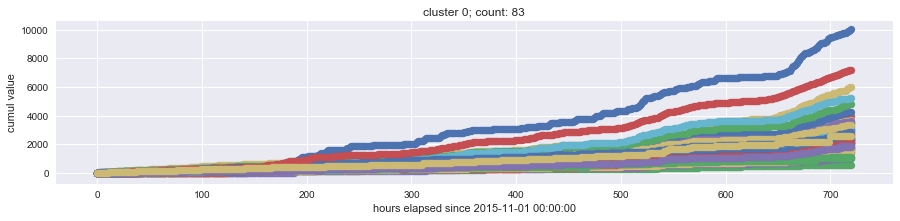

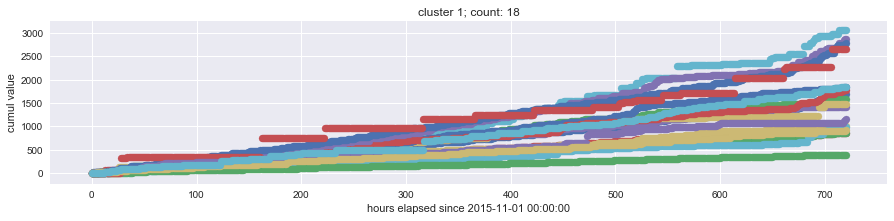

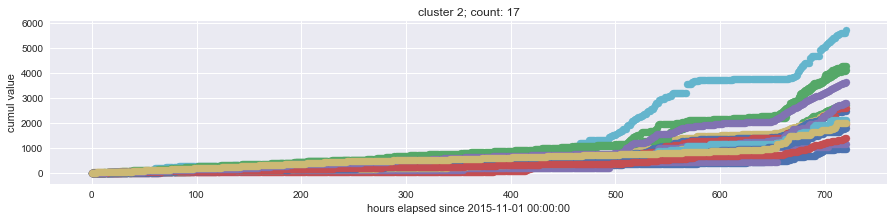

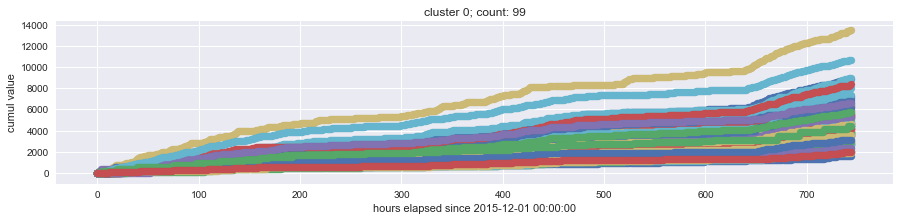

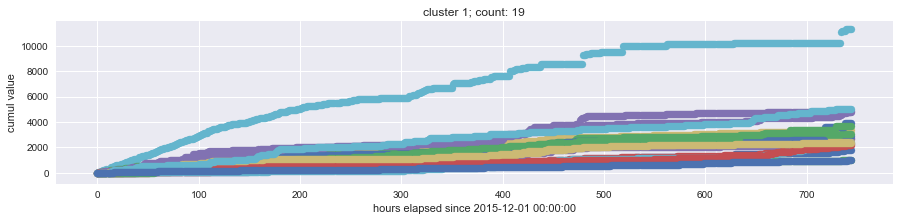

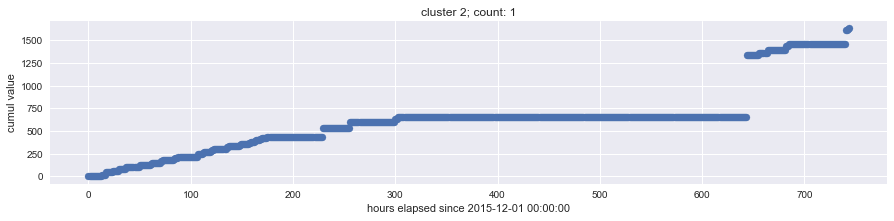

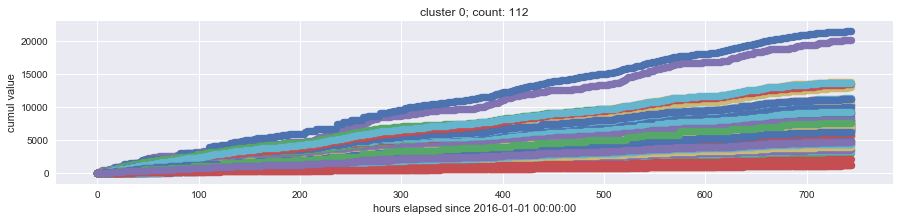

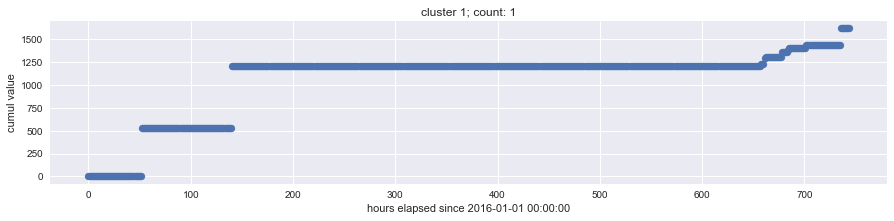

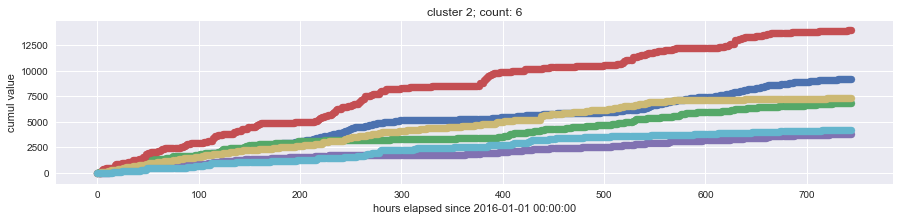

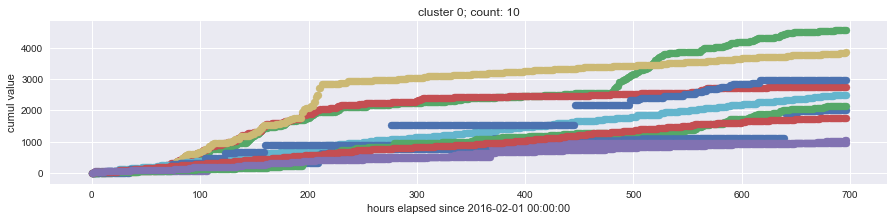

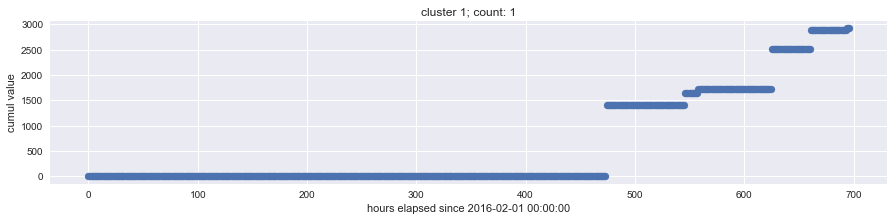

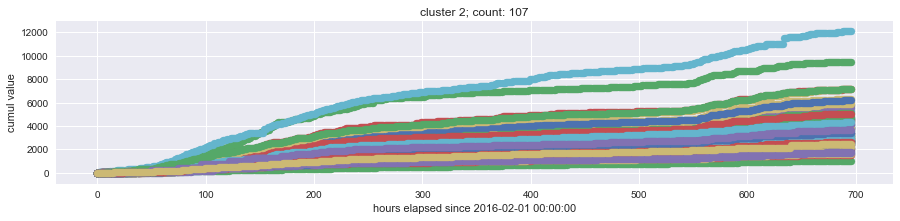

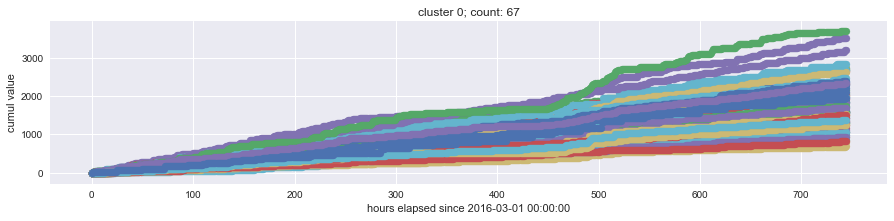

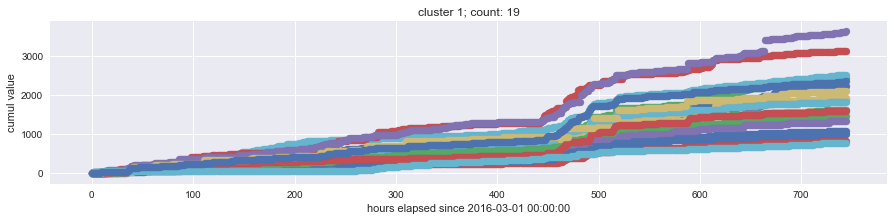

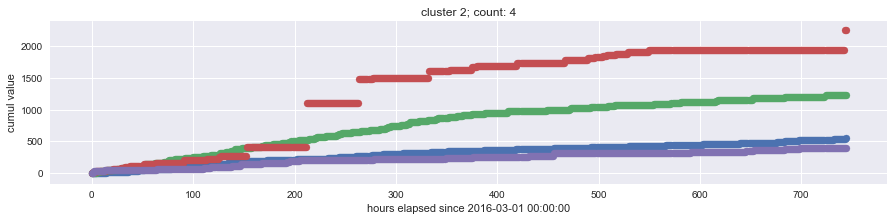

In [20]:
months = ['nov', 'dec', 'jan', 'feb', 'mar']
n_clusters = 3
for month in months:
    get_monthly_result(month, n_clusters)